In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.shape

(1000, 9)

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
# Date datetime çevir

df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [10]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
## En çok satan ürün
top_products=df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)

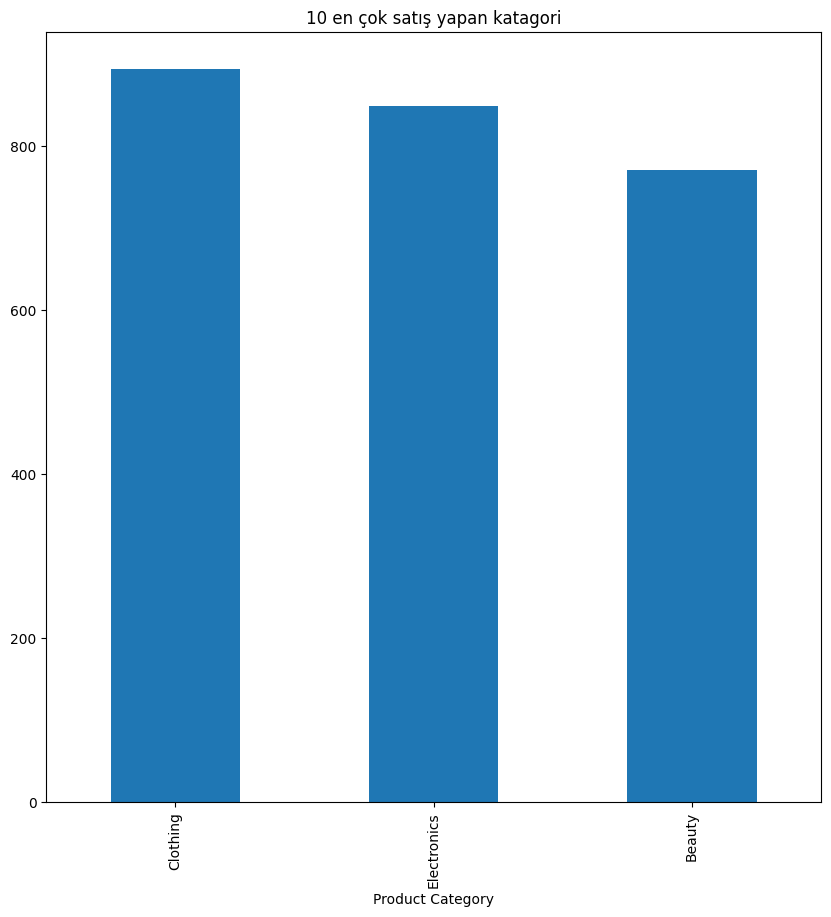

In [12]:
top_products.plot(kind='bar', figsize=(10,10),title='10 en çok satış yapan katagori')
plt.show()

In [13]:
# Gelire Göre en iyi 10 ürün

In [14]:
top_revenue_product=df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False).head(10)

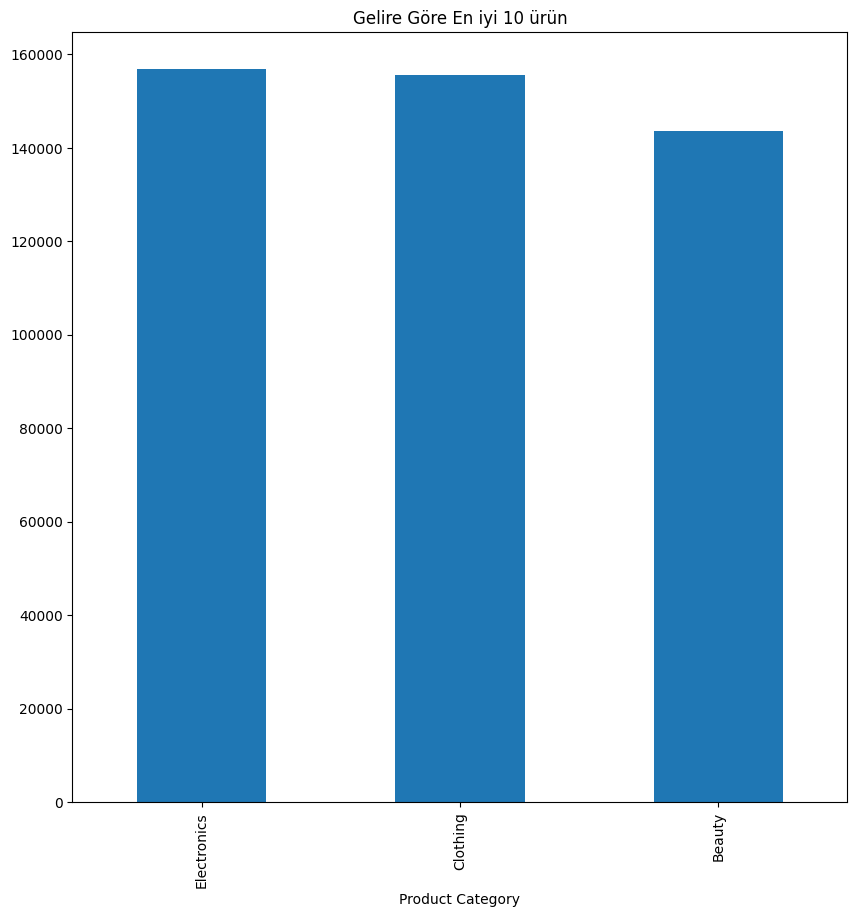

In [15]:
top_revenue_product.plot(kind='bar', figsize=(10,10), title='Gelire Göre En iyi 10 ürün')
plt.show()

C:\Users\htume\AppData\Local\Temp\ipykernel_1352\1165269571.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()


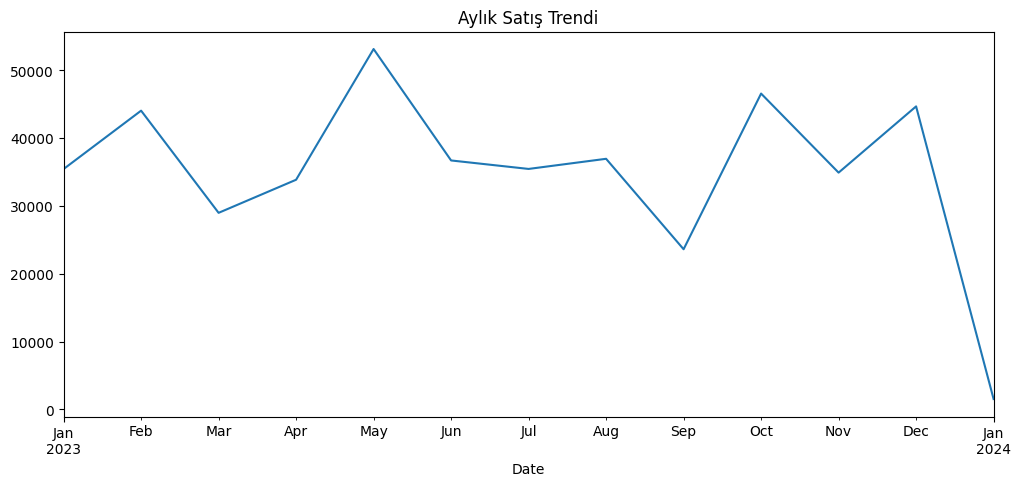

In [16]:
#2. Aylık satış trendi
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
monthly_sales.plot(figsize=(12,5), title="Aylık Satış Trendi")
plt.show()

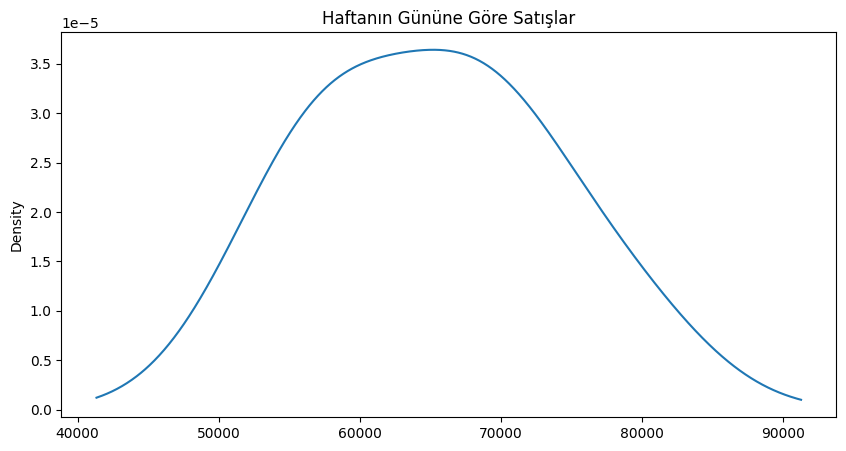

In [17]:
# 3. Haftanın günlerine göre satış
df['day_of_week'] = df['Date'].dt.day_name()
weekday_sales = df.groupby('day_of_week')['Total Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
weekday_sales.plot(kind='kde', figsize=(10,5), title="Haftanın Gününe Göre Satışlar")
plt.show()

In [18]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,day_of_week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Saturday


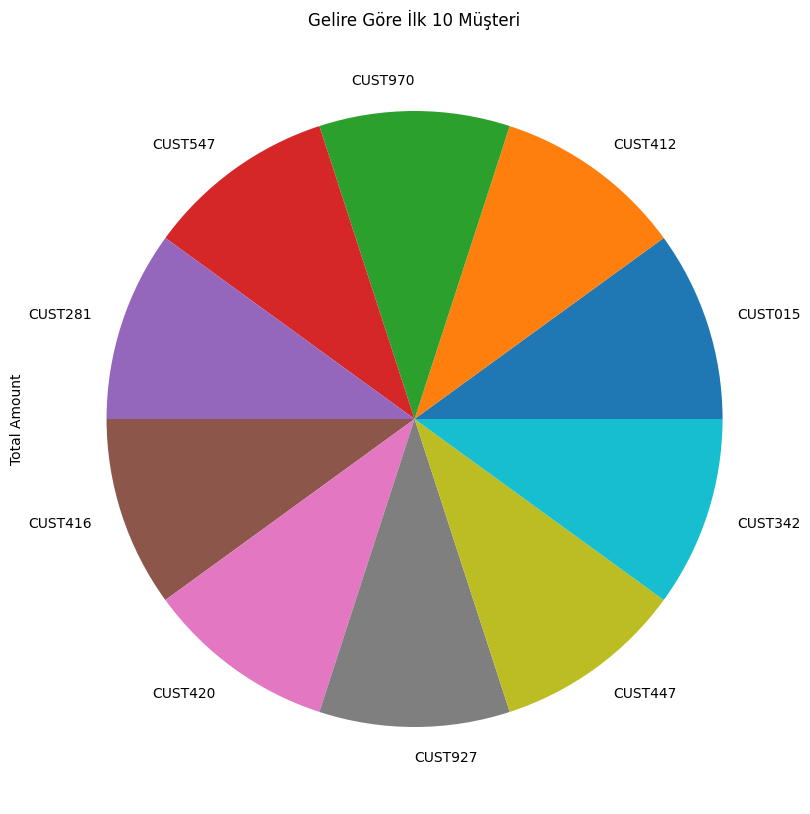

In [19]:
# 4. En çok alışveriş yapan müşteriler
top_customers = df.groupby("Customer ID")['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='pie', figsize=(10,10), title="Gelire Göre İlk 10 Müşteri")
plt.show()

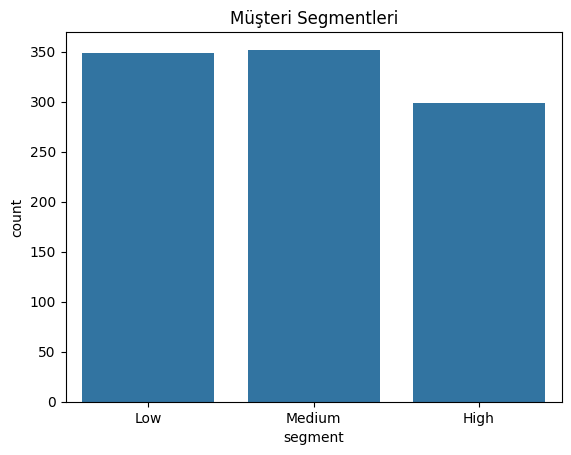

In [20]:
# 5. Müşteri segmentasyonu
df_customer = df.groupby("Customer ID")['Total Amount'].sum().reset_index()
df_customer['segment'] = pd.qcut(df_customer['Total Amount'], q=3, labels=['Low','Medium','High'])

sns.countplot(x='segment', data=df_customer, order=['Low','Medium','High'])
plt.title("Müşteri Segmentleri")
plt.show()